In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
%matplotlib notebook

In [3]:
register_matplotlib_converters()
%matplotlib notebook

### import spread

In [4]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_spread07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_spread = pd.read_csv(StringIO(csv_string))
df_spread.index = df_spread['Unnamed: 0']
df_spread = df_spread.drop('Unnamed: 0', axis=1)
df_spread.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_spread = df_spread.T
df_spread.index = pd.to_datetime(df_spread.index)
print(df_spread.shape)
df_spread.head()

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,0.6800,0.85,1.22,0.81,0.94,1.350,1.41,0.60,0.76,0.58,...,2.01,0.59,2.02,2.659,0.42,5.10,2.49,0.96,0.87,4.69
2007-01-04,0.5700,0.53,0.75,0.83,0.69,1.208,1.59,0.45,0.44,0.52,...,1.11,0.37,0.95,0.839,0.49,6.68,1.64,1.50,0.80,5.15
2007-01-05,0.3200,0.30,0.49,0.82,0.52,0.750,1.26,0.40,0.30,0.99,...,0.91,1.42,1.12,0.980,0.62,3.84,1.14,0.85,0.63,5.28
2007-01-08,0.4801,0.57,1.37,0.74,0.73,0.910,0.74,0.66,0.34,0.43,...,0.94,0.91,1.27,1.180,0.61,4.29,1.94,0.33,0.48,5.40
2007-01-09,0.3300,0.45,0.69,0.66,0.80,0.820,0.70,0.37,0.28,0.53,...,0.68,1.56,0.92,0.800,0.35,3.57,2.00,0.35,0.59,5.50


### import price

In [6]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_price07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_price = pd.read_csv(StringIO(csv_string))
df_price.index = df_price['Unnamed: 0']
df_price = df_price.drop('Unnamed: 0', axis=1)
df_price.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_price = df_price.T
df_price.index = pd.to_datetime(df_price.index)
print(df_price.shape)
df_price.head()

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,17.51,29.86,45.75,45.10,32.06,51.57,45.20,48.58,18.15,48.39,...,30.49,24.09,52.57,49.55,38.40,50.63,78.02,29.140,31.60,56.41
2007-01-04,17.68,29.81,46.15,45.08,31.88,52.66,46.50,48.60,18.02,48.31,...,31.21,24.09,52.91,49.23,38.22,50.09,76.55,25.493,31.33,55.38
2007-01-05,17.64,29.64,46.06,44.65,31.83,52.46,45.46,48.26,18.06,47.63,...,31.41,24.82,52.55,48.36,37.99,49.66,76.00,24.410,30.91,55.00
2007-01-08,17.86,29.93,46.90,44.92,31.99,52.59,45.30,48.57,18.03,47.56,...,31.59,24.66,53.32,48.99,37.90,48.72,76.17,24.710,31.05,56.05
2007-01-09,17.82,29.96,47.09,45.24,31.21,52.75,45.34,48.61,18.13,47.70,...,31.98,25.70,52.68,48.87,38.03,48.78,75.59,24.730,30.90,56.45


### create spread/price df

In [7]:
df_spread_price = df_spread/df_price
df_spread_price.head()

date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,0.038835,0.028466,0.026667,0.017960,0.029320,0.026178,0.031195,0.012351,0.041873,0.011986,...,0.065923,0.024491,0.038425,0.053663,0.010938,0.100731,0.031915,0.032944,0.027532,0.083141
2007-01-04,0.032240,0.017779,0.016251,0.018412,0.021644,0.022940,0.034194,0.009259,0.024417,0.010764,...,0.035566,0.015359,0.017955,0.017042,0.012821,0.133360,0.021424,0.058840,0.025535,0.092994
2007-01-05,0.018141,0.010121,0.010638,0.018365,0.016337,0.014297,0.027717,0.008288,0.016611,0.020785,...,0.028972,0.057212,0.021313,0.020265,0.016320,0.077326,0.015000,0.034822,0.020382,0.096000
2007-01-08,0.026881,0.019044,0.029211,0.016474,0.022820,0.017304,0.016336,0.013589,0.018857,0.009041,...,0.029756,0.036902,0.023818,0.024087,0.016095,0.088054,0.025469,0.013355,0.015459,0.096343
2007-01-09,0.018519,0.015020,0.014653,0.014589,0.025633,0.015545,0.015439,0.007612,0.015444,0.011111,...,0.021263,0.060700,0.017464,0.016370,0.009203,0.073186,0.026459,0.014153,0.019094,0.097431


### Generate Dates

In [8]:
dates = df_spread.index
worst_dates_dow = pd.to_datetime(['2008-10-15', '2008-12-1', '2008-10-9', '2008-9-29', '2011-8-8'])
#worst_dates_sp = 
worst_dates_dow

DatetimeIndex(['2008-10-15', '2008-12-01', '2008-10-09', '2008-09-29',
               '2011-08-08'],
              dtype='datetime64[ns]', freq=None)

In [14]:
means.describe()

count    388.000000
mean       0.025819
std        0.011997
min        0.013300
25%        0.020300
50%        0.024300
75%        0.029025
max        0.216600
dtype: float64

### sigmas

<IPython.core.display.Javascript object>


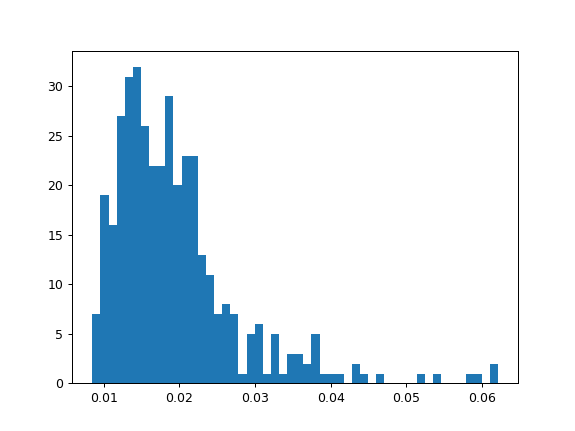

In [11]:
sigmas = []
for symbol in df_spread_price.columns:
    temp_sigma = round(df_spread_price[symbol].describe()['std'], 4)
    sigmas.append(temp_sigma)
sigmas = pd.Series(sigmas)
plt.hist(sigmas, bins=50)
plt.show()

### means

<IPython.core.display.Javascript object>


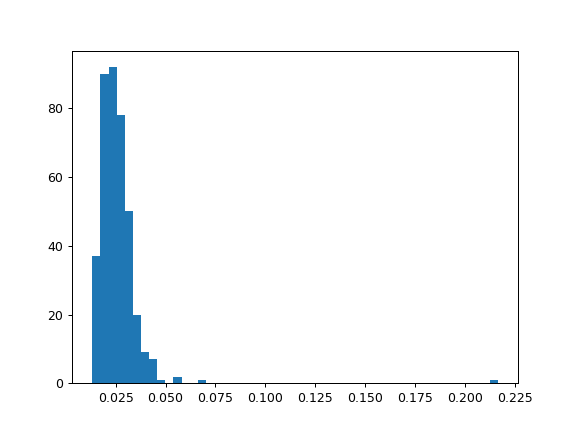

In [15]:
means = []
for symbol in df_spread_price.columns:
    temp_mean = round(df_spread_price[symbol].describe()['mean'], 4)
    means.append(temp_mean)
means = pd.Series(means)

plt.hist(means, 50)
plt.show()

### widest

<IPython.core.display.Javascript object>


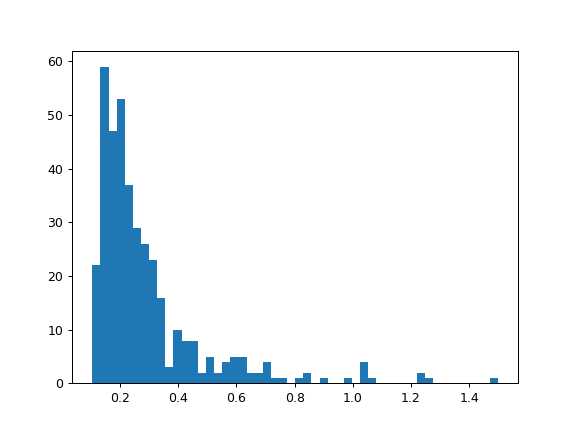

In [22]:
widest = []
for symbol in df_spread_price.columns:
    temp_wide = round(df_spread_price[symbol].describe()['max'], 4)
    widest.append(temp_wide)
widest = pd.Series(widest)

plt.hist(widest, 50)
plt.show()

### narrowest

<IPython.core.display.Javascript object>


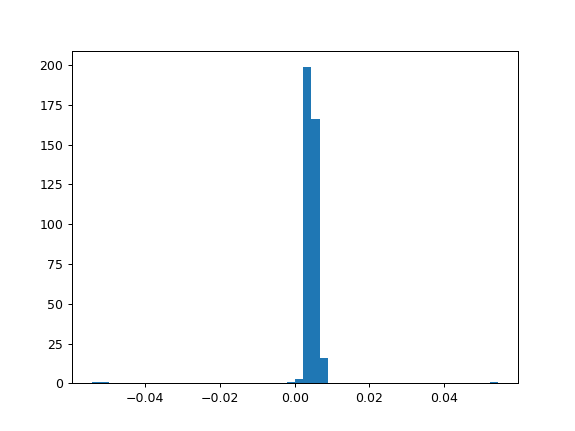

In [23]:
narrowest = []
for symbol in df_spread_price.columns:
    temp_narrow = round(df_spread_price[symbol].describe()['min'], 4)
    narrowest.append(temp_narrow)
narrowest = pd.Series(narrowest)

plt.hist(narrowest, 50)
plt.show()

### Generate Histograms









Batch 0


<IPython.core.display.Javascript object>


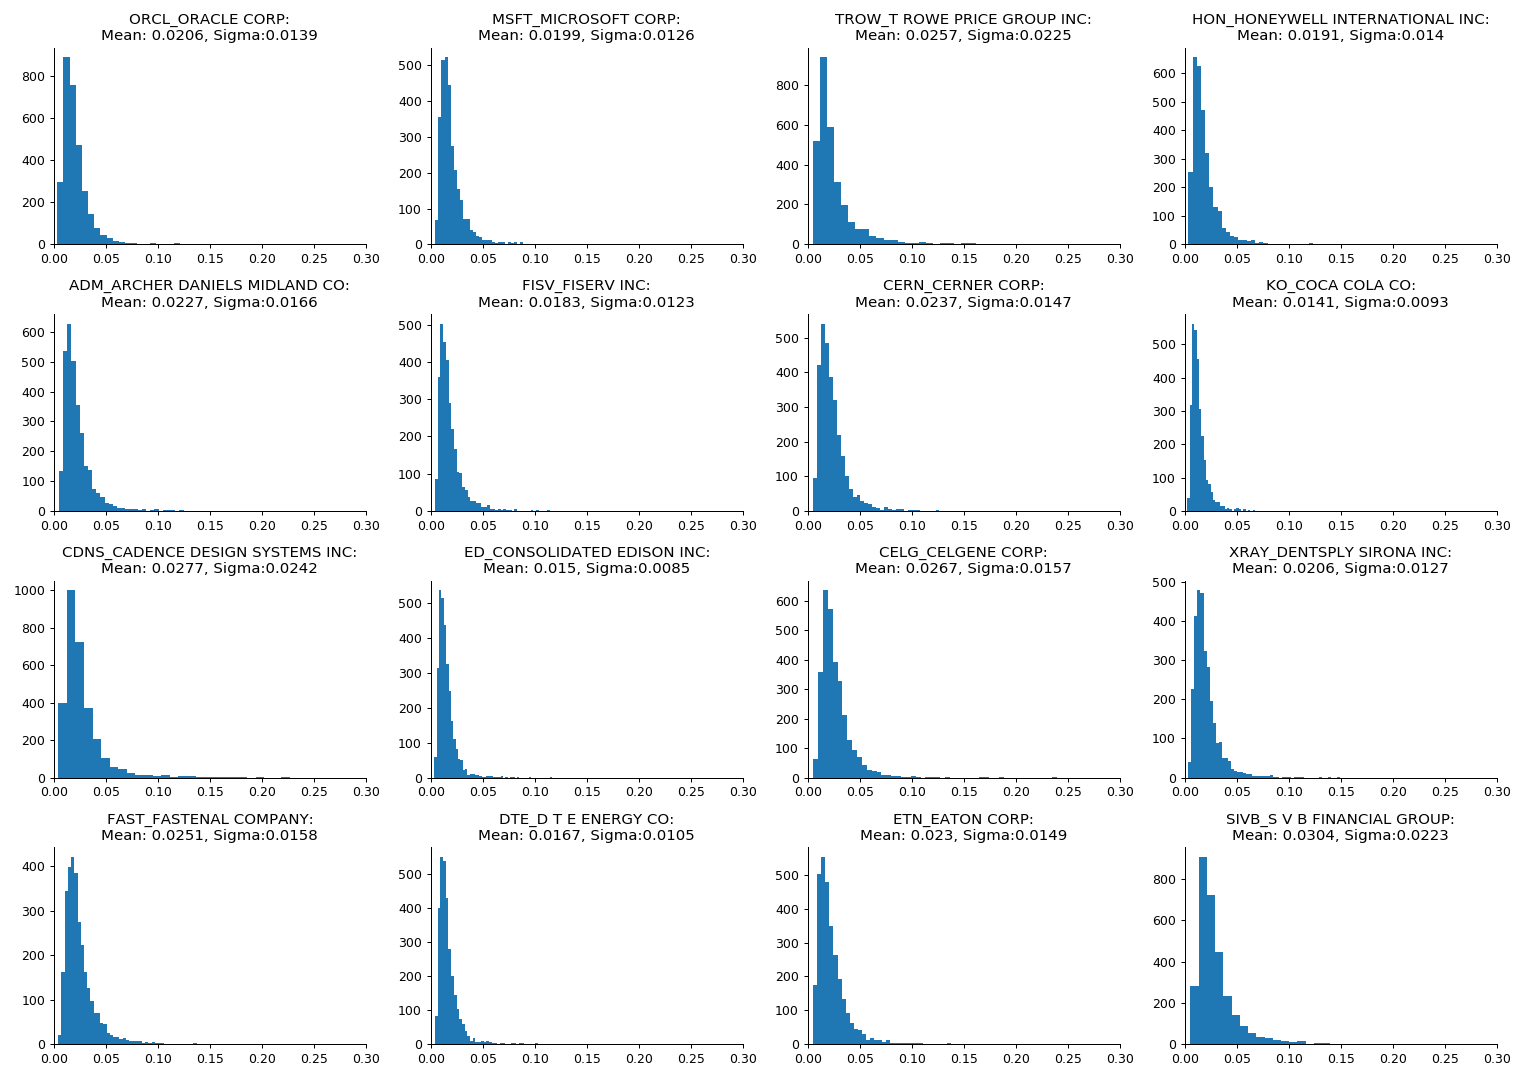

In [28]:
### matrix of subplots
n_cols = 4
n_rows = 4
n_plots = n_cols*n_rows
nloops = int(np.floor(388/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)


for i in range(nloops):
    nn = len(df_spread_price.columns)
    lower = i*n_plots
    upper = (i+1)*n_plots
    #print(lower, upper)
    temp_list = df_spread_price.columns[lower:upper]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))    
    
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(17,12))
    for k in range(n_rows):
        for l in range(n_cols):
            ###--Generate Plot---## 
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            temp_mean = round(df_spread_price[symbol].describe()['mean'], 4)
            temp_sigma = round(df_spread_price[symbol].describe()['std'], 4)
            
            ##--Generate Plot--#        
            ax[k,l].hist(df_spread_price[symbol], bins=50)
            ax[k,l].set_title('{}:\nMean: {}, Sigma:{}'.format(symbol, temp_mean, temp_sigma))
            ax[k,l].set_xlim([0, 0.3])
            #ax[k,l].set_ylim([0,1100])
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
                        
    fig.subplots_adjust(hspace=0.7)
    plt.tight_layout()
    plt.show()
    break

### Leftovers









Batch 0


<IPython.core.display.Javascript object>


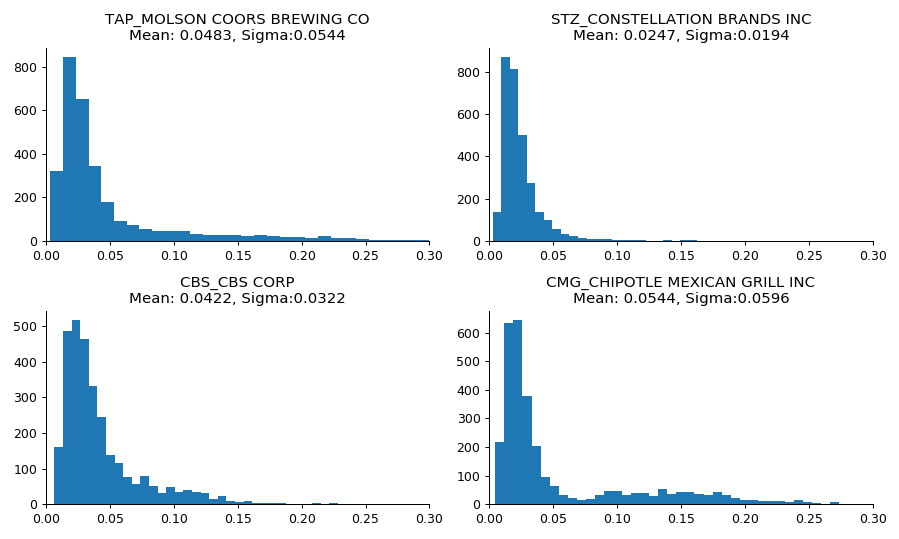

In [32]:
### matrix of subplots
n_cols = 2
n_rows = 2
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)



for i in range(nloops):
    nn = len(df_spread_price.columns)
    #print(lower, upper)
    temp_list = df_spread_price.columns[-n_plots:]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(10,6))
    for k in range(n_rows):
        for l in range(n_cols):
            ###--Generate Plot---## 
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### worst return, it's z-score and sigma value
            worst_return = df_spread_price[symbol].sort_values()[0]
            temp_mean = round(df_spread_price[symbol].describe()['mean'], 4)
            temp_sigma = round(df_spread_price[symbol].describe()['std'], 4)

                
            ##--Generate Plot--#        
            ax[k,l].hist(df_spread_price[symbol], bins=50)
            ax[k,l].set_title('{}\nMean: {}, Sigma:{}'.format(symbol, temp_mean, temp_sigma))
            ax[k,l].set_xlim([0, 0.3])
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)

    fig.subplots_adjust(hspace=0.7)
    plt.tight_layout()
    plt.show()   